# Project: Wrangle and Analyze WeRateDogs Twitter data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This notebook wrangles and analyzes the Twitter data from WeRateDogs, which is a Twitter account that rates dogs with a humorous content about the dog.

<a id='wrangling'></a>
## Data Wrangling



### Gathering data

In [2]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load in WeRateDogs Twitter archive csv file
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Gather tweet image predictions from file on internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
     file.write(response.content)

In [12]:
# Load in predictions from file 
df2 = pd.read_csv('image_predictions.tsv',sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Setup info to access Twitter to gather additional data 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            outfile.write(json.dumps(tweet) + '\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 356


Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success


1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 7193

Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
14

Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
16

Rate limit reached. Sleeping for: 686


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [11]:
# Read json file for additional data on tweets
selected = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data =json.loads(line)                            
        selected.append({'tweet_id': data['id'],
                         'favorites': data['favorite_count'],
                         'retweets': data['retweet_count'],
                         'language': data['lang'],
                         'timestamp': data['created_at']})
                        

df3 = pd.DataFrame(selected, columns = ['tweet_id', 'favorites', 'retweets', 'language', 'timestamp'])
df3.head()

,tweet_id,favorites,retweets,language,timestamp
0,892420643555336193,36238,7714,en,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,31259,5700,en,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23534,3779,en,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39540,7877,en,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,37757,8486,en,Sat Jul 29 16:00:24 +0000 2017


### Access

In [5]:
# Check value types and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1452,695767669421768709,6.753494e+17,4.196984e+09,2016-02-06 00:35:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If you are aware of who is making these please...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695767669...,13,10,None,None,None,None,None
1904,674632714662858753,NaN,NaN,2015-12-09 16:52:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare submerged pup here. Holds breath for a lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674632714...,5,10,None,None,None,None,None
1026,746131877086527488,NaN,NaN,2016-06-24 00:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustav. He has claimed that plant. It ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
1900,674664755118911488,NaN,NaN,2015-12-09 18:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,None,None,None,None


In [7]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
# Check for duplicates
df1[df1['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
# Check for erroneous names
df1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [9]:
# check text for correct names of dogs with erroneous ones with lowercase first letters

for i in df1[df1['name'].str.contains(r'^[a-z]')].index:
    print(i,df1.at[i,'text'])

22 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118 RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335 There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
369 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
542 We only rate dogs. P

In [7]:
# Check text for name with 'O'
df1[df1['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [18]:
# Check text for names labelled as None
for i in df1[df1['name']=='None'].index:
    print(i,df1.at[i,'text'])

5 Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7 When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12 Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24 You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25 This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30 @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32 RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35 I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
37 Here we have a corgi undercover as a malam

2139 Awesome dog here. Not sure where it is tho. Spectacular camouflage. Enjoys leaves. Not very soft. 5/10 still petable https://t.co/rOTOteKx4q
2142 Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ
2145 I've never seen a dog so genuinely happy about a tennis ball. 12/10 s'cute https://t.co/9RYY2NtHDw
2149 After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10
2155 Very human-like. Cute overbite smile *finger to earpiece* I'm being told that the dog is actually on the right
10/10 https://t.co/MSIbWu4YYs
2157 Special dog here. Pretty big. Neck kinda long for dog. Cool spots. Must be a Dalmatian variant. 6/10 would still pet https://t.co/f8GXeDbFzu
2166 Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m
2172 Just got home from college. Dis my dog. S

In [13]:
# examine how many have dog stages
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
# examine ratings
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
# check text of those with rating numerators greater than 20
for i in df1[df1['rating_numerator']>20].index:
    print(i,df1.at[i,'rating_numerator'],df1.at[i,'text'])

188 420 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 666 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290 182 @markhoppus 182/10
313 960 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340 75 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433 84 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 24 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695 75 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763 27 This is Sophie. She's a Jubilant Bush Pupper. Super h*ck

In [26]:
# check rating_denominator
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
# check text of those with rating denominators greater than the usual 10
for i in df1[df1['rating_denominator']>10].index:
    print(i,df1.at[i,'rating_denominator'],df1.at[i,'text'])

342 15 @docmisterio account started on 11/15/15
433 70 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
784 11 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902 150 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 11 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 170 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 20 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 50 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228 90 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254 80 Here's a brigade of p

In [18]:
# check datatypes and for null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True


In [18]:
# check for duplicates
df2[df2['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
# check predictions
df2['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [29]:
df2['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [13]:
# check datatypes and for null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   language   2331 non-null   object
 4   timestamp  2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [14]:
df3['language'].value_counts()

en     2313
und       7
nl        3
in        3
eu        1
ro        1
tl        1
es        1
et        1
Name: language, dtype: int64

#### Quality
##### df1: WeRateDogs twitter archived data table
- Many retweets are in table, where in_reply_to_status_id or retweeted_status_id is not null.
- Most of the incorrect words for dog names start with lowercase including such, quite, not,one
  except for None and O. O is supposed to be 0'Malley. Some of the correct dog names are found 
  in the text in these patterns 'named Rufus' or 'name is Daryl'. Some of the 'None' are really 
  Martha or Atlas.
- Several rating numerators are over 20 and some are incorrect
  since most ratings are on scale of 10 for the denominator.   
  Some rating denominators that are not 10 are incorrect.  Some are not valid ratings.
  Some ratings are incorrect due to decimal numerators. A few of denominators should be 10 but
  aren't because of other numbers in text such as 7/11 or 9/11.
- Only 384 with dog stages of doggo (older), puppo (teenager), or pupper (young). 
- Only 10 described as floofer.  
- timestamp should be datetime.
- dog stages and floofers should be category data types.
- Some tweets are not about dogs.

##### df2: image predictions table
- Some predictions are not of dogs (i.e. where p1.dog, p2.dog, or p3.dog is False).


#### Tidiness
- Ratings should be one column in df1 table instead of two columns - numerator and denominator
- Dog stages are three columns (doggo, puppo, pupper) and should be one column in df1 table
- retweet and favorite count columns in df3, the additional data table, should be in df1 table
- Best prediction of dog breed from df2 should be in df1 table

## Clean

In [19]:
# copy dataframes
archived_clean = df1.copy()
predictions_clean = df2.copy()
additional_clean = df3.copy()

In [14]:
# save cleaned dataframes to files
archived_clean.to_csv('archived_clean.csv', index=False)
predictions_clean.to_csv('predictions_clean.csv', index=False)
additional_clean.to_csv('additional_clean.csv', index=False)

In [3]:
# reload cleaned dataframes
archived_clean = pd.read_csv('archived_clean.csv')
predictions_clean = pd.read_csv('predictions_clean.csv')
additional_clean = pd.read_csv('additional_clean.csv')

### Quality

#### 1. Remove retweets and replies to other tweets

##### Define
Remove entries from archived data table that are retweets or replies to other tweets because 
we only want original tweets data.  in_reply_to_status_id is not null for replies and 
retweeted_status_id is not null for retweets.

##### Code

In [7]:
# create dataframe with where entries have nulls for in_reply_to_status_id and retweeted_status_id
archived_clean = archived_clean[archived_clean.in_reply_to_status_id.isnull() 
                               & archived_clean.retweeted_status_id.isnull()].copy()

#### Test

In [6]:
# check to see no non_null values for in_reply_to_status_id and retweeted_status_id
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [18]:
# can drop in_reply and retweeted columns
archived_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                     'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                    axis = 1, inplace=True)
archived_clean.reset_index(inplace=True)
archived_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               2097 non-null   int64 
 1   tweet_id            2097 non-null   int64 
 2   timestamp           2097 non-null   object
 3   source              2097 non-null   object
 4   text                2097 non-null   object
 5   expanded_urls       2094 non-null   object
 6   rating_numerator    2097 non-null   int64 
 7   rating_denominator  2097 non-null   int64 
 8   name                2097 non-null   object
 9   doggo               2097 non-null   object
 10  floofer             2097 non-null   object
 11  pupper              2097 non-null   object
 12  puppo               2097 non-null   object
dtypes: int64(4), object(9)
memory usage: 213.1+ KB


#### 2. Replace erroneous dog names with correct name or 'None'

##### Define
Replace name 'O' with OMalley.  Replace erroneous dog names with correct name if found in text column by doing a search for name or with None if not.

##### Code

In [6]:
# Replace 'O' with OMalley and convert text column to str
i = archived_clean[archived_clean['name']=='O'].index
archived_clean.at[i,'name'] = 'OMalley'

In [48]:
# Replace None as dog name if it is after 'name is' or 'named' in text column or is Martha or Atlas

archived_clean['text'].astype(str)
none_indexes = archived_clean[archived_clean['name']=='None'].index
for i in none_indexes:
    tweet = archived_clean.at[i,'text']
    match = re.search(r'(name is |named )(\w+)', tweet)
    if match:
        archived_clean.at[i,'name'] = match.group(2)
        print(i, match.group(2))
    elif 'Martha' in tweet:
        archived_clean.at[i,'name'] = 'Martha'
        print(i, 'Martha')
    elif 'Atlas' in tweet:
        archived_clean.at[i,'name'] = 'Atlas'
        print(i, 'Atlas')
  

32 Howard
65 Martha
140 Zoey
241 Atlas
520 Atlas
593 Atlas
1242 Martha
1441 Thea
1496 Sabertooth
1912 Zeus
1971 Guss
2009 Big
2011 Tickles


In [16]:
# Replace erroneous dog names that start with lowercase letter with correct name or None

lowercase_indexes = archived_clean[archived_clean['name'].str.contains(r'^[a-z]')].index
for i in lowercase_indexes:
    tweet = archived_clean.at[i,'text']
    if 'name' in tweet:
        match = re.search(r'(name is |named )(\w+)', tweet)
        print(i, match.group(2))
        archived_clean.at[i,'name'] = match.group(2)
    else:
        archived_clean.at[i,'name'] = 'None'
            

##### Test

In [7]:
# check O replaced - no O name should be found
archived_clean[archived_clean['name']=='O']

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
# check None entries replaced when name could be found in text column. Nothing should print out.

none_indexes = archived_clean[archived_clean['name']=='None'].index
for i in none_indexes:
    tweet = archived_clean.at[i,'text']
    match = re.search(r'(name is |named )(\w+)', tweet)
    if match:
        archived_clean.at[i,'name'] = match.group(2)
        print(i, match.group(2))
    elif 'Martha' in tweet:
        archived_clean.at[i,'name'] = 'Martha'
        print(i, 'Martha')
    elif 'Atlas' in tweet:
        archived_clean.at[i,'name'] = 'Atlas'
        print(i, 'Atlas')

In [18]:
# check to make sure no more dog names start with lowercase
archived_clean[archived_clean['name'].str.contains(r'^[a-z]')]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 3. Remove or correct invalid ratings   

#### Define
Remove entries that do not have valid ratings.  Replace erroneous rating numerators with rounded numerators for those ratings with decimal numerators.  Check text for '/10' pattern to find correct ratings for rating denominators greater than 10.

#### Code

In [21]:
# check text of those with rating numerators greater than 20
for i in archived_clean[archived_clean['rating_numerator']>20].index:
    print(i,archived_clean.at[i,'rating_numerator'],archived_clean.at[i,'text'])

339 84 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
403 24 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
528 75 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
586 27 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
700 165 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
770 1776 This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
904 204 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
985 50 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https:/

In [53]:
# Drop rows 403, 770, 1821 since they did not have valid ratings.
archived_clean.drop([403,770,1821],inplace=True)

In [48]:
# Replace ratings with decimal numerators with rounded values

archived_clean['text'].astype(str)
for i in archived_clean[archived_clean['rating_numerator']>20].index:
    tweet = archived_clean.at[i,'text']
    match = re.search(r'(\d+\.\d+)(/10)', tweet)
    if match:
        num = float(match.group(1))
        print(i,num)
        archived_clean.at[i,'rating_numerator'] = round(num)


528 9.75
586 11.27
1474 11.26


In [58]:
# check text of those with rating denominators greater than 10 for ratings in num/10 pattern. 
for i in archived_clean[archived_clean['rating_denominator']>10].index:
    tweet = archived_clean.at[i,'text']
    match = re.search(r'(\d+)(/10)', tweet)
    if match:
        num = int(match.group(1))
        print(i,num)
        archived_clean.at[i,'rating_numerator'] = num
        archived_clean.at[i,'rating_denominator'] = 10
    

853 14
948 13
985 11
1426 10


#### Test

In [54]:
# check text of those with rating numerators greater than 20. 
# Shouldn't see 403, 770, 528, 586, 1474, nor 1821
for i in archived_clean[archived_clean['rating_numerator']>20].index:
    print(i,archived_clean.at[i,'rating_numerator'],archived_clean.at[i,'text'])

339 84 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
700 165 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
904 204 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
985 50 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1011 99 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1036 80 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1056 45 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1129 60 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
1210 44 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.c

In [59]:
# check fixed denominators that are no longer greater than 10
fixed = [853, 948, 985, 1426]
for i in fixed:
    print(i,archived_clean.at[i,'rating_numerator'],archived_clean.at[i,'rating_denominator'],archived_clean.at[i,'text'])
    

853 14 10 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
948 13 10 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
985 11 10 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1426 10 10 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


#### 4. Search for more dog stages 

##### Define: Look in text for more dog stages, i.e. add 'pup' references to pupper stage, which is the youngest.  Create a separate dog_stage column in archived_clean dataframe.

##### Code:

In [11]:
# look for dog stages in text of each tweet and create new column for dog stages
dog_stages = []
count = 0
for i in archived_clean.index:
    tweet = archived_clean.at[i,'text'].lower()
    match = re.search(r'(doggo|puppo|pupper|pup)', tweet)
    if match:
        stage = match.group(0)
        print(i,stage)
        count +=1
        if stage == 'pup':
            stage = 'pupper'
        dog_stages.append(stage)
    else:
        dog_stages.append('None')
print('count: ', count)
            
        

1 pup
9 pup
12 puppo
14 pup
26 pup
28 pupper
29 pup
37 pup
39 doggo
40 pup
42 pup
44 pup
45 pupper
50 pupper
51 pupper
52 pup
64 puppo
67 pup
69 pup
72 pupper
73 pup
75 puppo
78 pup
81 pupper
83 puppo
85 pupper
86 doggo
92 puppo
93 pupper
94 doggo
95 doggo
103 pup
104 doggo
105 pup
106 pup
111 puppo
114 puppo
115 pupper
117 pup
119 pup
124 pup
125 pup
135 pup
138 pup
139 pup
140 puppo
143 puppo
145 pup
147 pup
149 pup
151 pup
154 puppo
160 pupper
161 doggo
164 pup
169 pup
175 pup
176 pup
177 pupper
183 pup
185 pup
189 pup
192 doggo
196 pup
199 doggo
200 pupper
201 pup
204 pup
206 pup
215 doggo
218 pup
220 pup
230 pup
231 pupper
234 puppo
235 pupper
237 pup
238 pup
239 pupper
242 pup
249 doggo
253 doggo
254 pup
259 pupper
260 doggo
265 pup
266 pup
267 doggo
268 doggo
269 doggo
274 doggo
275 pupper
278 pup
282 pup
283 doggo
284 doggo
287 pup
290 pup
292 doggo
294 pup
298 pupper
300 pup
303 doggo
304 doggo
306 doggo
308 doggo
309 pup
310 pup
311 pup
312 puppo
313 pup
314 puppo
317 pupper


In [14]:
archived_clean['dog_stage'] = np.array(dog_stages)
archived_clean.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,pupper
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


#### Test

In [18]:
# Test to see if missed any doggo's in dog_stages
archived_clean[(archived_clean['doggo']=='doggo' ) & (archived_clean['dog_stage']=='None')]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [16]:
# Test to see if missed any puppo's
archived_clean[(archived_clean['puppo']=='puppo' ) & (archived_clean['dog_stage']=='None')]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [19]:
# Test to see if missed any pupper's
archived_clean[(archived_clean['pupper']=='pupper' ) & (archived_clean['dog_stage']=='None')]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [20]:
# Check numbers of dog stages
archived_clean['dog_stage'].value_counts()

None      1507
pupper     477
doggo       82
puppo       28
Name: dog_stage, dtype: int64

#### 5. Search for more floofer's 

##### Define: Search for more floofer's by adding fluff to search pattern since floofers are fluffy.

##### Code:

In [27]:
# use regex search to find floof or fluff to find more references to floofers
count = 0
for i in archived_clean.index:
    tweet = archived_clean.at[i,'text'].lower()
    match = re.search(r'(floof|fluff)', tweet)
    if match:
        type = match.group(0)
        print(i,type)
        count +=1
        archived_clean.at[i,'floofer'] = 'floofer'       
        
print('count: ', count)

24 floof
42 floof
49 floof
89 fluff
161 floof
274 fluff
280 fluff
339 floof
449 floof
469 floof
475 floof
534 fluff
568 floof
570 floof
592 floof
606 floof
629 fluff
630 floof
642 floof
721 fluff
750 floof
756 floof
773 floof
790 floof
794 fluff
807 floof
822 fluff
873 floof
887 fluff
892 floof
894 fluff
897 fluff
907 fluff
933 floof
942 floof
947 floof
956 floof
1011 floof
1029 fluff
1047 floof
1048 floof
1122 floof
1133 fluff
1136 floof
1148 floof
1178 fluff
1181 fluff
1191 floof
1242 floof
1268 floof
1287 floof
1301 floof
1306 floof
1334 fluff
1342 fluff
1364 floof
1379 floof
1409 fluff
1439 fluff
1446 fluff
1452 fluff
1458 fluff
1521 fluff
1542 fluff
1581 fluff
1594 fluff
1632 fluff
1640 fluff
1668 fluff
1712 fluff
1722 fluff
1823 fluff
1842 fluff
2032 fluff
count:  74


#### Test

In [28]:
# check how many floofers
archived_clean['floofer'].value_counts()

None       2020
floofer      74
Name: floofer, dtype: int64

#### 6. Convert timestamp to datetime

##### Define: Convert timestamp to datetime using pd.to_datetime

##### Code:

In [9]:
# Convert timestamp to datetime
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

##### Test:

In [10]:
archived_clean.timestamp.dtype

datetime64[ns, UTC]

#### 7. Convert dog stages and floofer to category data type

##### Define:  Use astype to convert dog_stage and floofer to category data type

##### Code:

In [11]:
archived_clean = archived_clean.astype({'dog_stage':'category','floofer':'category'})

##### Test:

In [12]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1461
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          1455 non-null   int64              
 1   tweet_id       1455 non-null   int64              
 2   timestamp      1455 non-null   datetime64[ns, UTC]
 3   source         1455 non-null   object             
 4   text           1455 non-null   object             
 5   expanded_urls  1455 non-null   object             
 6   name           1455 non-null   object             
 7   floofer        1455 non-null   category           
 8   dog_stage      1455 non-null   category           
 9   rating         1455 non-null   float64            
 10  favorites      1455 non-null   float64            
 11  retweets       1455 non-null   float64            
 12  breed          1455 non-null   object             
dtypes: category(2), datetime64[ns, UTC](1), float64(

#### 8. Remove entries that predict the image is not a dog

##### Define: Only keep entries in image predictions table where p1_dog is True since the first prediction seems to have the highest confidence.

##### Code:

In [43]:
predictions_clean = predictions_clean[predictions_clean['p1_dog']==True].copy()

##### Test:

In [44]:
predictions_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### Tidiness

#### 1. Create one column for dog ratings

##### Define: Create one column for dog ratings where rating = numerator/denominator.  

##### Code:


In [47]:
archived_clean['rating'] = archived_clean['rating_numerator'] / archived_clean['rating_denominator']

In [52]:
# Drop rating numerator and rating denominator columns
archived_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace=True)

##### Test:

In [53]:
# check to see if rating values look reasonable
archived_clean.describe()

,index,tweet_id,rating
count,2094.000000,2.094000e+03,2094.000000
mean,1237.422159,7.365488e+17,1.060888
std,672.609883,6.711414e+16,0.215086
min,0.000000,6.660209e+17,0.000000
25%,689.250000,6.768202e+17,1.000000
50%,1266.500000,7.097095e+17,1.100000
75%,1810.750000,7.876377e+17,1.200000
max,2355.000000,8.924206e+17,1.400000


#### 2. Make dog stages just one column in archived table

##### Define: Keep dog_stage column created above and remove extranenous doggo, puppo, and pupper columns.
    
##### Code:

In [55]:
archived_clean.drop(['doggo','puppo','pupper'], axis = 1, inplace=True)

##### Test:

In [56]:
# Check to see if extraneous columns gone
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          2094 non-null   int64              
 1   tweet_id       2094 non-null   int64              
 2   timestamp      2094 non-null   datetime64[ns, UTC]
 3   source         2094 non-null   object             
 4   text           2094 non-null   object             
 5   expanded_urls  2091 non-null   object             
 6   name           2094 non-null   object             
 7   floofer        2094 non-null   category           
 8   dog_stage      2094 non-null   category           
 9   rating         2094 non-null   float64            
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 135.4+ KB


#### 3. Add retweet and favorite count columns from additional dataframe to archived dataframe

##### Define: Add retweet and favorite count columns  to archived_clean dataframe using merge function.

##### Code:

In [59]:
# drop language and timestamp from additional_clean since not needed in analysis
additional_clean.drop(['language','timestamp'], axis=1, inplace=True)
additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2331 non-null   int64
 1   favorites  2331 non-null   int64
 2   retweets   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [62]:
archived_clean = pd.merge(archived_clean, additional_clean,on=['tweet_id'],how='left')
archived_clean.head()

,index,tweet_id,timestamp,source,text,expanded_urls,name,floofer,dog_stage,rating,favorites,retweets
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,1.3,36238.0,7714.0
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,pupper,1.3,31259.0,5700.0
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,1.2,23534.0,3779.0
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,1.3,39540.0,7877.0
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,1.2,37757.0,8486.0


##### Test:

In [63]:
# check for favorite and retweet columns
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          2094 non-null   int64              
 1   tweet_id       2094 non-null   int64              
 2   timestamp      2094 non-null   datetime64[ns, UTC]
 3   source         2094 non-null   object             
 4   text           2094 non-null   object             
 5   expanded_urls  2091 non-null   object             
 6   name           2094 non-null   object             
 7   floofer        2094 non-null   category           
 8   dog_stage      2094 non-null   category           
 9   rating         2094 non-null   float64            
 10  favorites      2087 non-null   float64            
 11  retweets       2087 non-null   float64            
dtypes: category(2), datetime64[ns, UTC](1), float64(3), int64(2), object(4)
memory usage: 184.3+ KB


#### 4. Add best prediction of dog breed to archived dataframe and remove non-dogs

##### Define: Use merge to add the best prediction of dog breed to archived dataframe.

##### Code:

In [77]:
# create separate dataframe for best prediction of dog breed
dog_breeds = predictions_clean[['tweet_id','p1']].copy()
dog_breeds.head()

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [75]:
# check breeds are dogs
dog_breeds['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [80]:
# get intersection so can eliminate non-dogs from archived dataframe and retweets
archived_clean = pd.merge(archived_clean, dog_breeds,on=['tweet_id'],how='inner')
archived_clean.head()

,index,tweet_id,timestamp,source,text,expanded_urls,name,floofer,dog_stage,rating,favorites,retweets,p1
0,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,pupper,1.3,31259.0,5700.0,Chihuahua
1,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,1.2,23534.0,3779.0,Chihuahua
2,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,1.2,37757.0,8486.0,basset
3,5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,1.3,19014.0,2844.0,Chesapeake_Bay_retriever
4,6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,1.3,11073.0,1851.0,Appenzeller


In [3]:
# change column name of p1 to breed
archived_clean.rename(columns={'p1':'breed'}, inplace=True)

In [6]:
# Look for nulls in archived_clean dataframe 
pd.isnull(archived_clean).sum() > 0

index            False
tweet_id         False
timestamp        False
source           False
text             False
expanded_urls    False
name             False
floofer          False
dog_stage        False
rating           False
favorites         True
retweets          True
breed            False
dtype: bool

In [7]:
#Drop row entries missing favorites and retweets counts
archived_clean.dropna(axis=0, inplace=True)

##### Test:

In [13]:
# check for dog breed column and no nulls
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1461
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          1455 non-null   int64              
 1   tweet_id       1455 non-null   int64              
 2   timestamp      1455 non-null   datetime64[ns, UTC]
 3   source         1455 non-null   object             
 4   text           1455 non-null   object             
 5   expanded_urls  1455 non-null   object             
 6   name           1455 non-null   object             
 7   floofer        1455 non-null   category           
 8   dog_stage      1455 non-null   category           
 9   rating         1455 non-null   float64            
 10  favorites      1455 non-null   float64            
 11  retweets       1455 non-null   float64            
 12  breed          1455 non-null   object             
dtypes: category(2), datetime64[ns, UTC](1), float64(

In [15]:
# Save combined and clean master archived dataframe to master csv
archived_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What is the most popular dog stage - doggo, puppo, or pupper?

In [16]:
# find out how many of each stage
archived_clean.dog_stage.value_counts()

None      1073
pupper     308
doggo       51
puppo       23
Name: dog_stage, dtype: int64

In [20]:
# find out average rating, favorites, and retweets for each stage
archived_clean.groupby('dog_stage').mean()

,index,tweet_id,rating,favorites,retweets
dog_stage,,,,,
None,1251.410065,7.359720e+17,1.078285,7925.951538,2265.217148
doggo,607.803922,7.985105e+17,1.176471,19685.490196,6809.274510
pupper,1169.717532,7.407435e+17,1.108442,8211.512987,2211.668831
puppo,443.956522,8.228697e+17,1.213043,23111.391304,6305.217391


In [22]:
# find out total numbers of favorites and retweets
archived_clean.groupby('dog_stage').sum()

,index,tweet_id,rating,favorites,retweets
dog_stage,,,,,
None,1342763.0,7.896979e+20,1157.0,8504546.0,2430578.0
doggo,30998.0,4.072404e+19,60.0,1003960.0,347273.0
pupper,360273.0,2.281490e+20,341.4,2529146.0,681194.0
puppo,10211.0,1.892600e+19,27.9,531562.0,145020.0


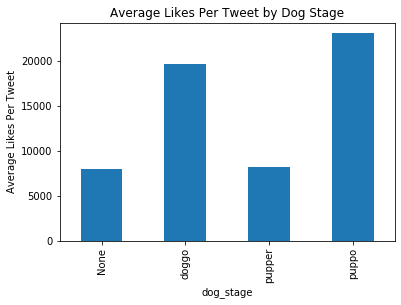

In [5]:
# plot Likes by Dog Stage
plt.ylabel('Average Likes Per Tweet')
plt.title('Average Likes Per Tweet by Dog Stage')
archived_clean.groupby('dog_stage').favorites.mean().plot(kind='bar');

**Pupper, the youngest stage, has the most total numbers of tweets and likes but 
the middle stage of puppo has the largest average number of likes per tweet.**

### Question 2:  Which is more popular floofers or non-floofers?

In [27]:
# find out how many floofers and non-floofers
archived_clean['floofer'].value_counts()

None       1399
floofer      56
Name: floofer, dtype: int64

In [28]:
# check means
archived_clean.groupby('floofer').mean()

,index,tweet_id,rating,favorites,retweets
floofer,,,,,
None,1202.71837,7.404785e+17,1.087491,8654.450322,2477.538956
floofer,1100.75000,7.422768e+17,1.158929,8243.535714,2464.071429


In [29]:
# check totals
archived_clean.groupby('floofer').sum()

,index,tweet_id,rating,favorites,retweets
floofer,,,,,
None,1682603.0,1.035929e+21,1521.4,12107576.0,3466077.0
floofer,61642.0,4.156750e+19,64.9,461638.0,137988.0


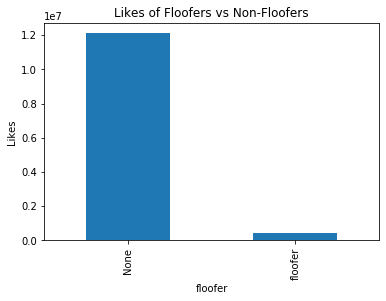

In [7]:
# plot Likes of Floofers vs Non-Floofers
plt.ylabel('Likes')
plt.title('Likes of Floofers vs Non-Floofers')
archived_clean.groupby('floofer').favorites.sum().plot(kind='bar');

**The non-floofer's outnumber the floofer's tweets and likes as well as have a slightly higher average of likes per tweet.**

### Question 3: What is the most predicted breed of dog?

In [34]:
# check numbers of each
archived_clean['breed'].value_counts()

golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
standard_schnauzer      1
EntleBucher             1
clumber                 1
groenendael             1
silky_terrier           1
Name: breed, Length: 111, dtype: int64

In [39]:
# check means for top 4 dog breeds
archived_clean.query('breed == "golden_retriever"').mean()

index        1.020118e+03
tweet_id     7.577467e+17
rating       1.158088e+00
favorites    1.156499e+04
retweets     3.274294e+03
dtype: float64

In [40]:
archived_clean.query('breed == "Labrador_retriever"').mean()

index        1.146902e+03
tweet_id     7.449255e+17
rating       1.108696e+00
favorites    1.072322e+04
retweets     3.390793e+03
dtype: float64

In [41]:
archived_clean.query('breed == "Pembroke"').mean()

index        1.045023e+03
tweet_id     7.560529e+17
rating       1.144318e+00
favorites    1.057241e+04
retweets     2.826011e+03
dtype: float64

In [42]:
archived_clean.query('breed == "Chihuahua"').mean()

index        1.390538e+03
tweet_id     7.242511e+17
rating       1.069231e+00
favorites    8.229090e+03
retweets     2.562821e+03
dtype: float64

**The golden retriever has the highest number of tweets and highest average rating.**

### Question 4. What is the overall trend of number of likes per day over time?

In [49]:
# get sum of likes by date
df_likes = archived_clean.groupby('timestamp')['favorites'].sum()
df_likes.tail()

timestamp
2017-07-28 16:27:12+00:00    11073.0
2017-07-29 00:08:17+00:00    19014.0
2017-07-29 16:00:24+00:00    37757.0
2017-07-31 00:18:03+00:00    23534.0
2017-08-01 00:17:27+00:00    31259.0
Name: favorites, dtype: float64

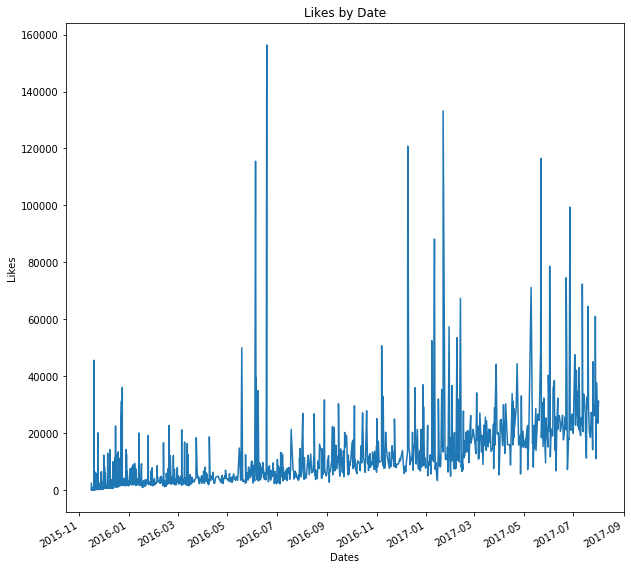

In [47]:
# Plot Likes by Date
plt.figure(figsize=(10,10))
df_likes.plot(x_compat=True)
plt.ylabel('Likes')
plt.xlabel('Dates')
plt.title('Likes by Date')
plt.show()

**The total number of likes per day seems to be on the rise.**

<a id='conclusions'></a>
## Conclusions

> Twitter data from WeRateDogs was wrangled from three different sources, cleaned, and merged into one dataframe, which is saved in twitter_archived_master.csv.  More details on the wrangling and cleaning process can be found in wrangle_report.pdf.  Based on an analysis of the data, pupper is the most popular dog stage, non-floofers are more tweeted about than floofers, and golden retrievers seem to be the most predicted breed.  Also the total number of likes per day seems to be increasing.  Refer to act_report.pdf for a more detailed analysis.

### Resources:

>This report used information from the following resources to accomplish certain tasks:
https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
https://stackoverflow.com/questions/26137955/python-regex-for-number-with-or-without-decimals-using-a-dot-or-comma-as-separat
https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python
https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
Also information was obtained from the Udacity DataAnalyst Nanodegree course.